In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

### coco: 894 // flickr: 184 // open_image: 616

In [2]:
dir_path = "../Data/disaster/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
disaster = img_names[:4000]
print(len(disaster))

4000


In [3]:
## open_image 1만장
dir_path = "../../disk/Data/open_image/train_0/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
open_image_non = img_names[:3000]
print(len(open_image_non))

3000


In [4]:
## coco_image 1만장
dir_path = "../Data/train2017"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
coco_non = img_names[:3000]
print(len(coco_non))

3000


In [5]:
print(coco_non[:3])

['../Data/train2017/000000505888.jpg', '../Data/train2017/000000013934.jpg', '../Data/train2017/000000314023.jpg']


In [6]:
non = coco_non + open_image_non
random.shuffle(non)
print(len(non))

6000


##### labeling

##### split train, test

In [7]:
### train: test (4:1)
## 36000 (1/4), 4000 (1/4)
non_ratio=4500
dis_ratio=3000
trn_disater = non[:non_ratio] + disaster[:dis_ratio]
tst_disater = non[non_ratio:] + disaster[dis_ratio:]
trn_label = [0]*int(len(non[:non_ratio])) + [1]*int(len(disaster[:dis_ratio]))
tst_label = [0]*int(len(non[non_ratio:])) + [1]*int(len(disaster[dis_ratio:]))
print(len(trn_label))
print(len(tst_label))


7500
2500


In [8]:
trn_df = pd.DataFrame(trn_disater, columns=['image_id'])
trn_df['dir'] = trn_df['image_id'].apply(lambda x: os.path.dirname(x))
trn_df['image_id'] = trn_df['image_id'].apply(lambda x: os.path.basename(x))
trn_df['label'] = trn_label
train = trn_df
train

,image_id,dir,label
0,015d0a2f7fdfbe10.jpg,../../disk/Data/open_image/train_0,0
1,0d37a74bfdac76a4.jpg,../../disk/Data/open_image/train_0,0
2,0b34f2ae2bed11f9.jpg,../../disk/Data/open_image/train_0,0
3,0190aa0e659eccc3.jpg,../../disk/Data/open_image/train_0,0
4,02db07cca1ca60e6.jpg,../../disk/Data/open_image/train_0,0
...,...,...,...
7495,As we can see in the image there is grass plan...,../Data/disaster/generated/open_image/.ipynb_c...,1
7496,76de10f902cfddf4_03.jpg,../Data/disaster/augmented,1
7497,000000180857_03.jpg,../Data/disaster/augmented,1
7498,Some streetlights in a largely flooded urban a...,../Data/disaster/generated/coco,1


In [9]:
tst_df = pd.DataFrame(tst_disater, columns=['image_id'])
tst_df['dir'] = tst_df['image_id'].apply(lambda x: os.path.dirname(x))
tst_df['image_id'] = tst_df['image_id'].apply(lambda x: os.path.basename(x))
tst_df['label'] = tst_label
test = tst_df
test

,image_id,dir,label
0,000000204804.jpg,../Data/train2017,0
1,0f9cb4d5a8c3b2ac.jpg,../../disk/Data/open_image/train_0,0
2,000000337256.jpg,../Data/train2017,0
3,000000278295.jpg,../Data/train2017,0
4,000000530670.jpg,../Data/train2017,0
...,...,...,...
2495,In this image we can see one big building one ...,../Data/disaster/generated/open_image,1
2496,A street and traffic signals in the fog._02.png,../Data/disaster/generated/coco,1
2497,In this picture I see a van in front which is ...,../Data/disaster/generated/open_image,1
2498,000000222245_03.jpg,../Data/disaster/augmented,1


In [11]:
project_name = 'disaster_classfication_tf_efficientnet_b2_ns_01'
user = 'hojunking'
run_name = 'disaster_classfication_tf_efficientnet_b2_ns_01'

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hojunking. Use `wandb login --relogin` to force relogin


Training start with fold: 0 epoch: 100 

Fold: 0
Epoch 0/99


epoch 0 loss: 0.2373: 100%|█████████████████████| 24/24 [00:22<00:00,  1.05it/s]


Fold: 0
Epoch 1/99


epoch 1 loss: 0.0673: 100%|█████████████████████| 24/24 [00:04<00:00,  5.98it/s]


Fold: 0
Epoch 2/99


epoch 2 loss: 0.0399: 100%|█████████████████████| 24/24 [00:04<00:00,  5.96it/s]


Fold: 0
Epoch 3/99


epoch 3 loss: 0.0291: 100%|█████████████████████| 24/24 [00:03<00:00,  6.19it/s]


Fold: 0
Epoch 4/99


epoch 4 loss: 0.0298: 100%|█████████████████████| 24/24 [00:03<00:00,  6.09it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9895804341856229
Fold: 0
Epoch 5/99



epoch 5 loss: 0.0254: 100%|█████████████████████| 24/24 [00:04<00:00,  5.91it/s]


Fold: 0
Epoch 6/99


epoch 6 loss: 0.0281: 100%|█████████████████████| 24/24 [00:04<00:00,  5.76it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9909646551208859
Fold: 0
Epoch 7/99



epoch 7 loss: 0.0319: 100%|█████████████████████| 24/24 [00:03<00:00,  6.18it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9909646551208859
Fold: 0
Epoch 8/99



epoch 8 loss: 0.0262: 100%|█████████████████████| 24/24 [00:04<00:00,  5.76it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9909646551208859
Fold: 0
Epoch 9/99



epoch 9 loss: 0.0242: 100%|█████████████████████| 24/24 [00:03<00:00,  6.07it/s]


Fold: 0
Epoch 10/99


epoch 10 loss: 0.0183: 100%|████████████████████| 24/24 [00:04<00:00,  5.77it/s]


Fold: 0
Epoch 11/99


epoch 11 loss: 0.0212: 100%|████████████████████| 24/24 [00:03<00:00,  6.15it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9923503981270065
Fold: 0
Epoch 12/99



epoch 12 loss: 0.0293: 100%|████████████████████| 24/24 [00:03<00:00,  6.07it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9923503981270065
Fold: 0
Epoch 13/99



epoch 13 loss: 0.0265: 100%|████████████████████| 24/24 [00:04<00:00,  5.90it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9923503981270065
Fold: 0
Epoch 14/99



epoch 14 loss: 0.0235: 100%|████████████████████| 24/24 [00:03<00:00,  6.40it/s]


Fold: 0
Epoch 15/99


epoch 15 loss: 0.0199: 100%|████████████████████| 24/24 [00:03<00:00,  6.10it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9930516825119187
Fold: 0
Epoch 16/99



epoch 16 loss: 0.0224: 100%|████████████████████| 24/24 [00:03<00:00,  6.19it/s]


Fold: 0
Epoch 17/99


epoch 17 loss: 0.0220: 100%|████████████████████| 24/24 [00:03<00:00,  6.37it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9930555555555556
Fold: 0
Epoch 18/99



epoch 18 loss: 0.0203: 100%|████████████████████| 24/24 [00:03<00:00,  6.19it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9930555555555556
Fold: 0
Epoch 19/99



epoch 19 loss: 0.0202: 100%|████████████████████| 24/24 [00:03<00:00,  6.27it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9930555555555556
Fold: 0
Epoch 20/99



epoch 20 loss: 0.0204: 100%|████████████████████| 24/24 [00:03<00:00,  6.18it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9930555555555556
Fold: 0
Epoch 21/99



epoch 21 loss: 0.0188: 100%|████████████████████| 24/24 [00:03<00:00,  6.21it/s]


EarlyStopping counter: 5 out of 5
Best F1 score from now: 0.9930555555555556
stop called
time : 0:11:16
fold: 0, Best Epoch : 16/ 22
fold: 0, Best Train Marco F1 : 1.00000
[[3600    0]
 [   0 3600]]
fold: 0, Best Valid Marco F1 : 0.99306
[[895   5]
 [  5 595]]
---------------------------------------------------------
Training start with fold: 1 epoch: 100 

Fold: 1
Epoch 0/99


epoch 0 loss: 0.2261: 100%|█████████████████████| 24/24 [00:03<00:00,  6.02it/s]


Fold: 1
Epoch 1/99


epoch 1 loss: 0.0901: 100%|█████████████████████| 24/24 [00:04<00:00,  5.95it/s]


Fold: 1
Epoch 2/99


epoch 2 loss: 0.0564: 100%|█████████████████████| 24/24 [00:03<00:00,  6.05it/s]


Fold: 1
Epoch 3/99


epoch 3 loss: 0.0451: 100%|█████████████████████| 24/24 [00:03<00:00,  6.01it/s]


Fold: 1
Epoch 4/99


epoch 4 loss: 0.0434: 100%|█████████████████████| 24/24 [00:03<00:00,  6.28it/s]


Fold: 1
Epoch 5/99


epoch 5 loss: 0.0350: 100%|█████████████████████| 24/24 [00:03<00:00,  6.22it/s]


Fold: 1
Epoch 6/99


epoch 6 loss: 0.0404: 100%|█████████████████████| 24/24 [00:04<00:00,  5.87it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9895746020625606
Fold: 1
Epoch 7/99



epoch 7 loss: 0.0448: 100%|█████████████████████| 24/24 [00:04<00:00,  5.84it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9895746020625606
Fold: 1
Epoch 8/99



epoch 8 loss: 0.0491: 100%|█████████████████████| 24/24 [00:03<00:00,  6.10it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9895746020625606
Fold: 1
Epoch 9/99



epoch 9 loss: 0.0522: 100%|█████████████████████| 24/24 [00:03<00:00,  6.05it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9895746020625606
Fold: 1
Epoch 10/99



epoch 10 loss: 0.0516: 100%|████████████████████| 24/24 [00:04<00:00,  5.88it/s]


EarlyStopping counter: 5 out of 5
Best F1 score from now: 0.9895746020625606
stop called
time : 0:05:02
fold: 1, Best Epoch : 5/ 11
fold: 1, Best Train Marco F1 : 0.99778
[[3595    5]
 [  11 3589]]
fold: 1, Best Valid Marco F1 : 0.98957
[[894   6]
 [  9 591]]
---------------------------------------------------------
Training start with fold: 2 epoch: 100 

Fold: 2
Epoch 0/99


epoch 0 loss: 0.2357: 100%|█████████████████████| 24/24 [00:03<00:00,  6.15it/s]


Fold: 2
Epoch 1/99


epoch 1 loss: 0.0760: 100%|█████████████████████| 24/24 [00:03<00:00,  6.26it/s]


Fold: 2
Epoch 2/99


epoch 2 loss: 0.0591: 100%|█████████████████████| 24/24 [00:03<00:00,  6.19it/s]


Fold: 2
Epoch 3/99


epoch 3 loss: 0.0654: 100%|█████████████████████| 24/24 [00:04<00:00,  6.00it/s]


Fold: 2
Epoch 4/99


epoch 4 loss: 0.0527: 100%|█████████████████████| 24/24 [00:04<00:00,  5.79it/s]


Fold: 2
Epoch 5/99


epoch 5 loss: 0.0504: 100%|█████████████████████| 24/24 [00:04<00:00,  5.93it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9826437020474414
Fold: 2
Epoch 6/99



epoch 6 loss: 0.0506: 100%|█████████████████████| 24/24 [00:04<00:00,  5.91it/s]
/tmp/ipykernel_547496/3748737016.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure().add_subplot(1, 1, 1)


Fold: 2
Epoch 7/99


epoch 7 loss: 0.0492: 100%|█████████████████████| 24/24 [00:04<00:00,  5.87it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.984049746298501
Fold: 2
Epoch 8/99



epoch 8 loss: 0.0509: 100%|█████████████████████| 24/24 [00:04<00:00,  5.87it/s]


Fold: 2
Epoch 9/99


epoch 9 loss: 0.0417: 100%|█████████████████████| 24/24 [00:03<00:00,  6.21it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9861414971617787
Fold: 2
Epoch 10/99



epoch 10 loss: 0.0461: 100%|████████████████████| 24/24 [00:04<00:00,  5.78it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9861414971617787
Fold: 2
Epoch 11/99



epoch 11 loss: 0.0528: 100%|████████████████████| 24/24 [00:03<00:00,  6.30it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9861414971617787
Fold: 2
Epoch 12/99



epoch 12 loss: 0.0462: 100%|████████████████████| 24/24 [00:03<00:00,  6.10it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9861414971617787
Fold: 2
Epoch 13/99



epoch 13 loss: 0.0413: 100%|████████████████████| 24/24 [00:03<00:00,  6.15it/s]


Fold: 2
Epoch 14/99


epoch 14 loss: 0.0486: 100%|████████████████████| 24/24 [00:04<00:00,  5.74it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9868092135560556
Fold: 2
Epoch 15/99



epoch 15 loss: 0.0402: 100%|████████████████████| 24/24 [00:04<00:00,  5.92it/s]


Fold: 2
Epoch 16/99


epoch 16 loss: 0.0418: 100%|████████████████████| 24/24 [00:04<00:00,  5.91it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.987520591024809
Fold: 2
Epoch 17/99



epoch 17 loss: 0.0503: 100%|████████████████████| 24/24 [00:03<00:00,  6.09it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.987520591024809
Fold: 2
Epoch 18/99



epoch 18 loss: 0.0551: 100%|████████████████████| 24/24 [00:03<00:00,  6.24it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.987520591024809
Fold: 2
Epoch 19/99



epoch 19 loss: 0.0469: 100%|████████████████████| 24/24 [00:03<00:00,  6.15it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.987520591024809
Fold: 2
Epoch 20/99



epoch 20 loss: 0.0427: 100%|████████████████████| 24/24 [00:03<00:00,  6.23it/s]


Fold: 2
Epoch 21/99


epoch 21 loss: 0.0455: 100%|████████████████████| 24/24 [00:04<00:00,  5.91it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 2
Epoch 22/99



epoch 22 loss: 0.0505: 100%|████████████████████| 24/24 [00:03<00:00,  6.09it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 2
Epoch 23/99



epoch 23 loss: 0.0470: 100%|████████████████████| 24/24 [00:03<00:00,  6.42it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 2
Epoch 24/99



epoch 24 loss: 0.0451: 100%|████████████████████| 24/24 [00:03<00:00,  6.11it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 2
Epoch 25/99



epoch 25 loss: 0.0563: 100%|████████████████████| 24/24 [00:03<00:00,  6.14it/s]


EarlyStopping counter: 5 out of 5
Best F1 score from now: 0.9888888888888889
stop called
time : 0:11:58
fold: 2, Best Epoch : 20/ 26
fold: 2, Best Train Marco F1 : 1.00000
[[3600    0]
 [   0 3600]]
fold: 2, Best Valid Marco F1 : 0.98889
[[892   8]
 [  8 592]]
---------------------------------------------------------
Training start with fold: 3 epoch: 100 

Fold: 3
Epoch 0/99


epoch 0 loss: 0.2166: 100%|█████████████████████| 24/24 [00:04<00:00,  5.94it/s]


Fold: 3
Epoch 1/99


epoch 1 loss: 0.0615: 100%|█████████████████████| 24/24 [00:03<00:00,  6.49it/s]


Fold: 3
Epoch 2/99


epoch 2 loss: 0.0412: 100%|█████████████████████| 24/24 [00:03<00:00,  6.05it/s]


Fold: 3
Epoch 3/99


epoch 3 loss: 0.0362: 100%|█████████████████████| 24/24 [00:03<00:00,  6.43it/s]


Fold: 3
Epoch 4/99


epoch 4 loss: 0.0311: 100%|█████████████████████| 24/24 [00:04<00:00,  5.99it/s]


Fold: 3
Epoch 5/99


epoch 5 loss: 0.0358: 100%|█████████████████████| 24/24 [00:03<00:00,  6.18it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9930593985922609
Fold: 3
Epoch 6/99



epoch 6 loss: 0.0327: 100%|█████████████████████| 24/24 [00:03<00:00,  6.55it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9930593985922609
Fold: 3
Epoch 7/99



epoch 7 loss: 0.0317: 100%|█████████████████████| 24/24 [00:03<00:00,  6.29it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9930593985922609
Fold: 3
Epoch 8/99



epoch 8 loss: 0.0341: 100%|█████████████████████| 24/24 [00:03<00:00,  6.07it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9930593985922609
Fold: 3
Epoch 9/99



epoch 9 loss: 0.0267: 100%|█████████████████████| 24/24 [00:03<00:00,  6.17it/s]


Fold: 3
Epoch 10/99


epoch 10 loss: 0.0322: 100%|████████████████████| 24/24 [00:03<00:00,  6.27it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9951455749604132
Fold: 3
Epoch 11/99



epoch 11 loss: 0.0315: 100%|████████████████████| 24/24 [00:03<00:00,  6.07it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9951455749604132
Fold: 3
Epoch 12/99



epoch 12 loss: 0.0384: 100%|████████████████████| 24/24 [00:03<00:00,  6.29it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9951455749604132
Fold: 3
Epoch 13/99



epoch 13 loss: 0.0299: 100%|████████████████████| 24/24 [00:04<00:00,  5.96it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9951455749604132
Fold: 3
Epoch 14/99



epoch 14 loss: 0.0382: 100%|████████████████████| 24/24 [00:04<00:00,  5.89it/s]


EarlyStopping counter: 5 out of 5
Best F1 score from now: 0.9951455749604132
stop called
time : 0:06:52
fold: 3, Best Epoch : 9/ 15
fold: 3, Best Train Marco F1 : 0.99986
[[3599    1]
 [   0 3600]]
fold: 3, Best Valid Marco F1 : 0.99515
[[894   6]
 [  1 599]]
---------------------------------------------------------
Training start with fold: 4 epoch: 100 

Fold: 4
Epoch 0/99


epoch 0 loss: 0.2347: 100%|█████████████████████| 24/24 [00:03<00:00,  6.52it/s]


Fold: 4
Epoch 1/99


epoch 1 loss: 0.0770: 100%|█████████████████████| 24/24 [00:03<00:00,  6.43it/s]


Fold: 4
Epoch 2/99


epoch 2 loss: 0.0457: 100%|█████████████████████| 24/24 [00:04<00:00,  5.82it/s]


Fold: 4
Epoch 3/99


epoch 3 loss: 0.0452: 100%|█████████████████████| 24/24 [00:04<00:00,  5.86it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9819936285147051
Fold: 4
Epoch 4/99



epoch 4 loss: 0.0445: 100%|█████████████████████| 24/24 [00:03<00:00,  6.10it/s]


Fold: 4
Epoch 5/99


epoch 5 loss: 0.0423: 100%|█████████████████████| 24/24 [00:03<00:00,  6.30it/s]

Fold: 4
Epoch 6/99



epoch 6 loss: 0.0365: 100%|█████████████████████| 24/24 [00:03<00:00,  6.11it/s]


Fold: 4
Epoch 7/99


epoch 7 loss: 0.0398: 100%|█████████████████████| 24/24 [00:03<00:00,  6.21it/s]


Fold: 4
Epoch 8/99


epoch 8 loss: 0.0389: 100%|█████████████████████| 24/24 [00:03<00:00,  6.04it/s]


Fold: 4
Epoch 9/99


epoch 9 loss: 0.0385: 100%|█████████████████████| 24/24 [00:04<00:00,  5.85it/s]

EarlyStopping counter: 1 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 4
Epoch 10/99



epoch 10 loss: 0.0334: 100%|████████████████████| 24/24 [00:04<00:00,  5.87it/s]

EarlyStopping counter: 2 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 4
Epoch 11/99



epoch 11 loss: 0.0397: 100%|████████████████████| 24/24 [00:04<00:00,  6.00it/s]

EarlyStopping counter: 3 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 4
Epoch 12/99



epoch 12 loss: 0.0410: 100%|████████████████████| 24/24 [00:03<00:00,  6.01it/s]

EarlyStopping counter: 4 out of 5
Best F1 score from now: 0.9888888888888889
Fold: 4
Epoch 13/99



epoch 13 loss: 0.0446: 100%|████████████████████| 24/24 [00:04<00:00,  5.92it/s]


EarlyStopping counter: 5 out of 5
Best F1 score from now: 0.9888888888888889
stop called
time : 0:06:24
fold: 4, Best Epoch : 8/ 14
fold: 4, Best Train Marco F1 : 0.99944
[[3597    3]
 [   1 3599]]
fold: 4, Best Valid Marco F1 : 0.98889
[[892   8]
 [  8 592]]
---------------------------------------------------------


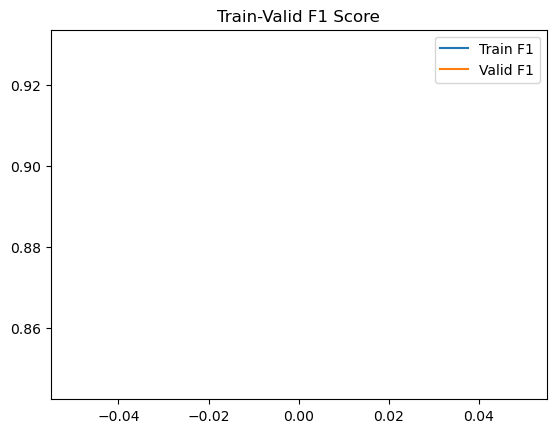

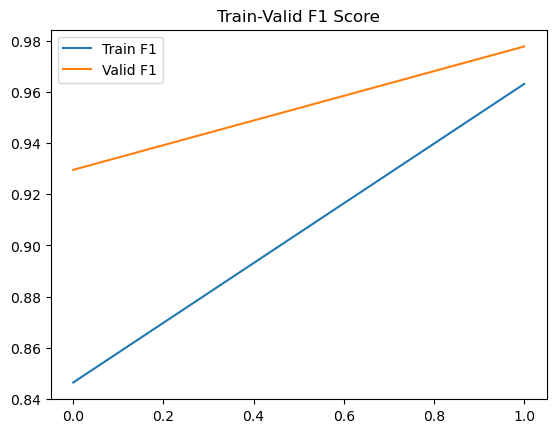

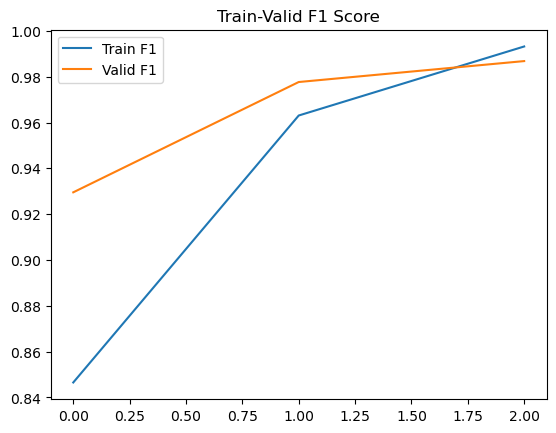

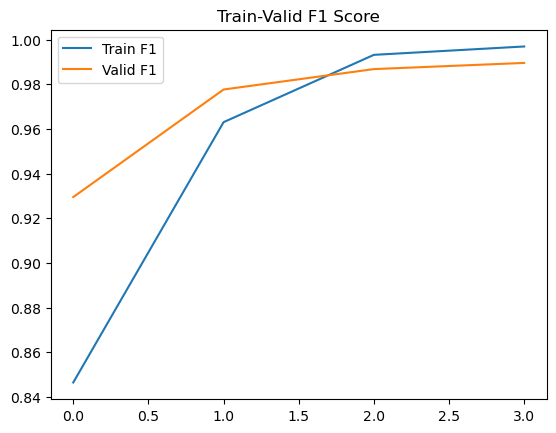

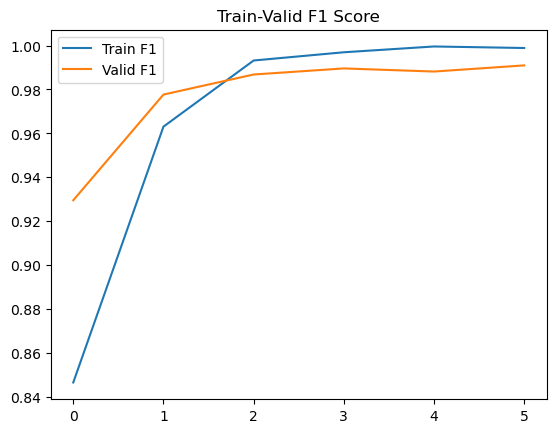

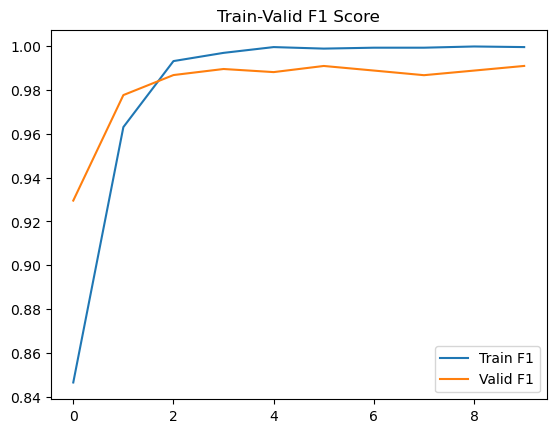

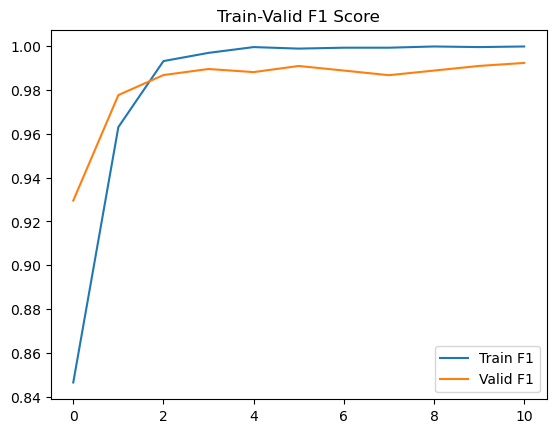

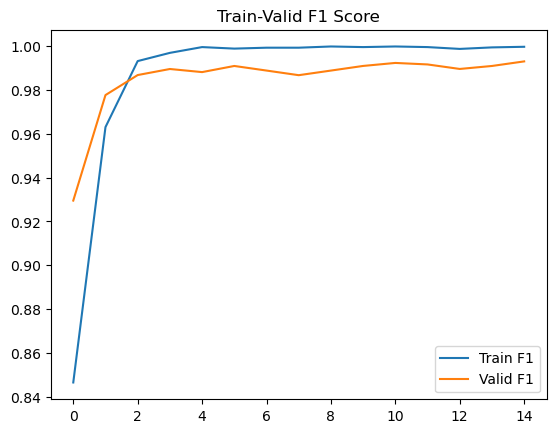

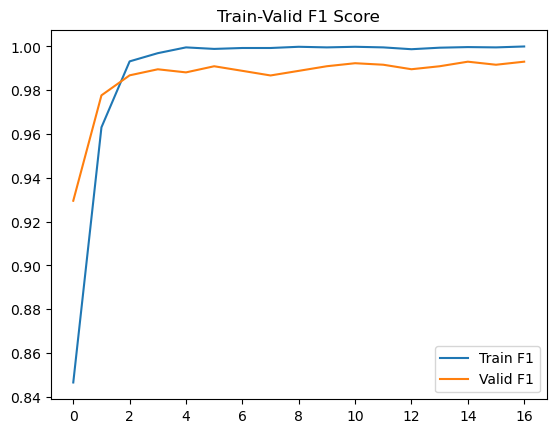

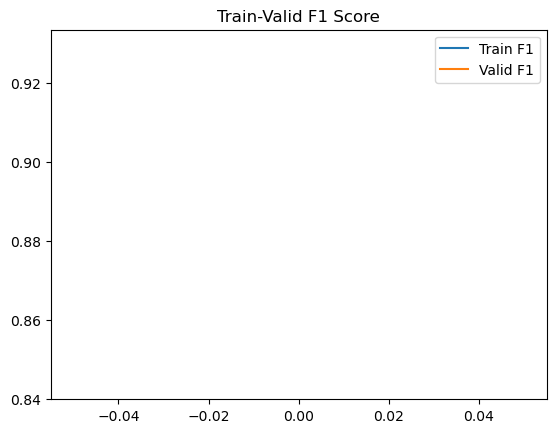

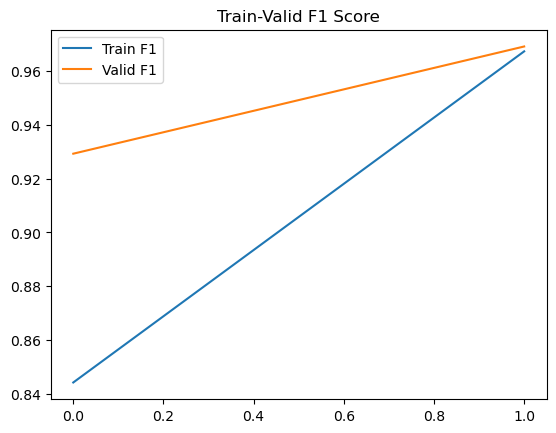

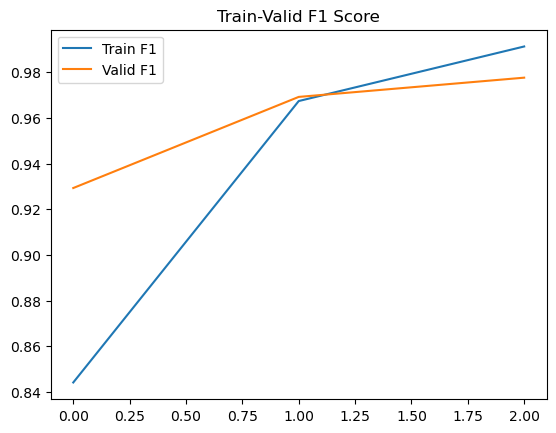

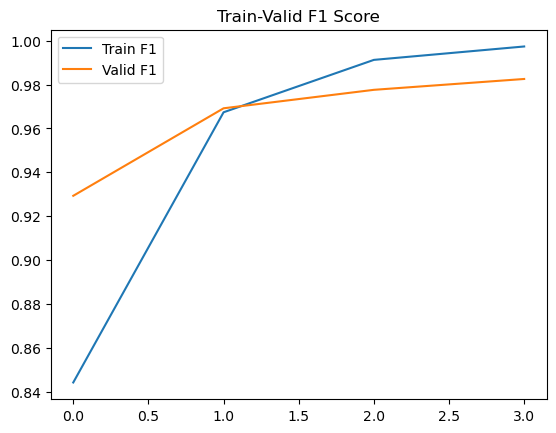

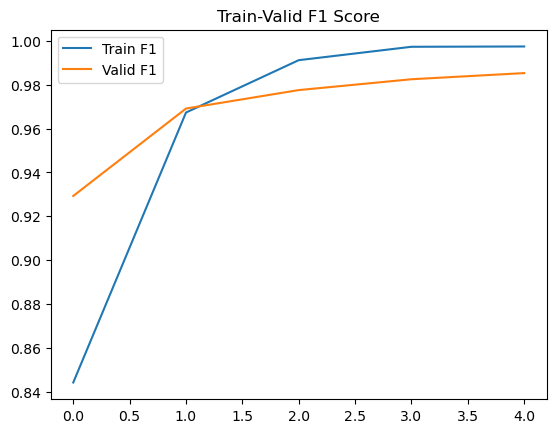

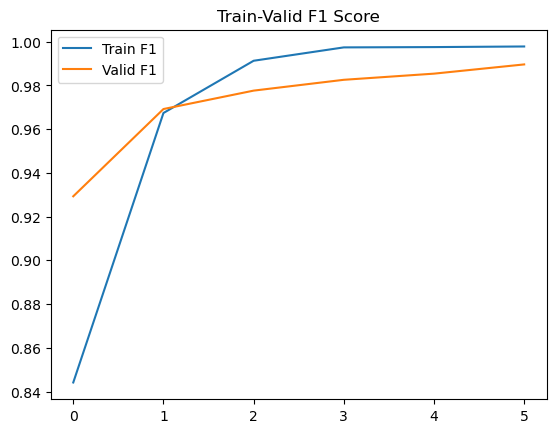

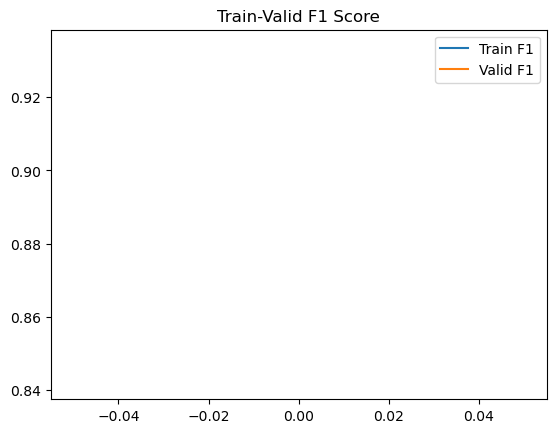

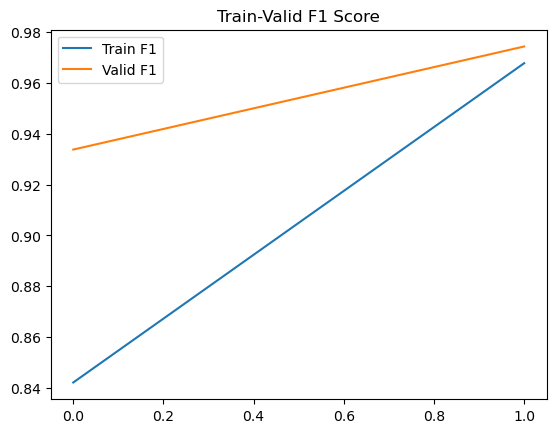

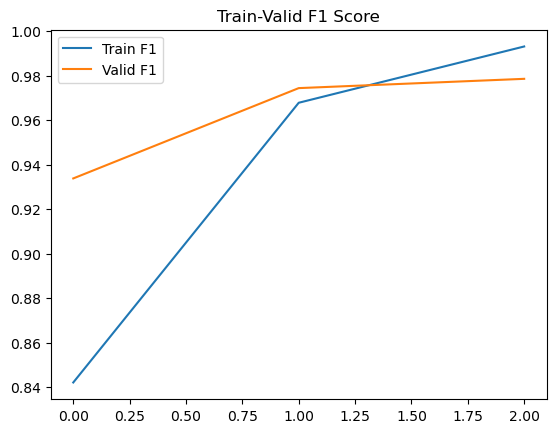

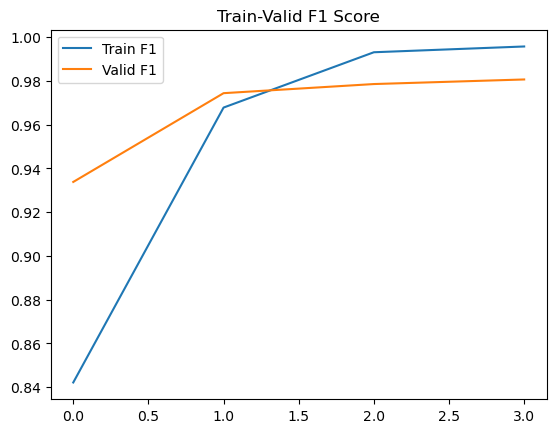

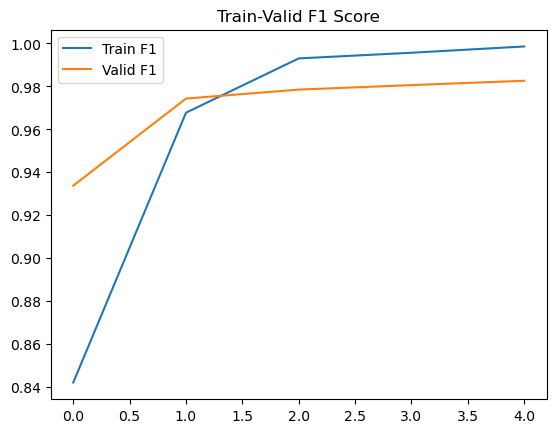

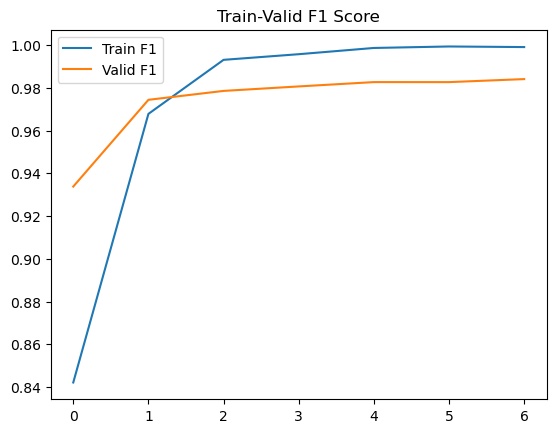

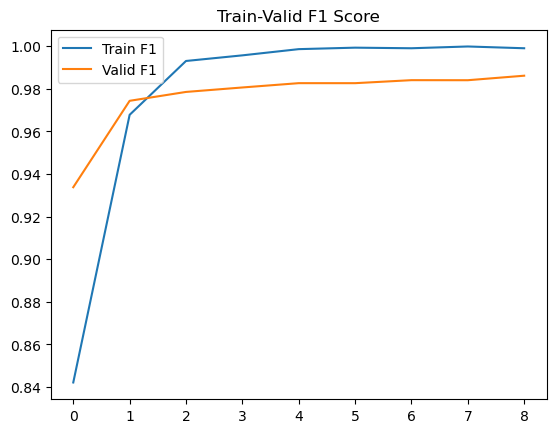

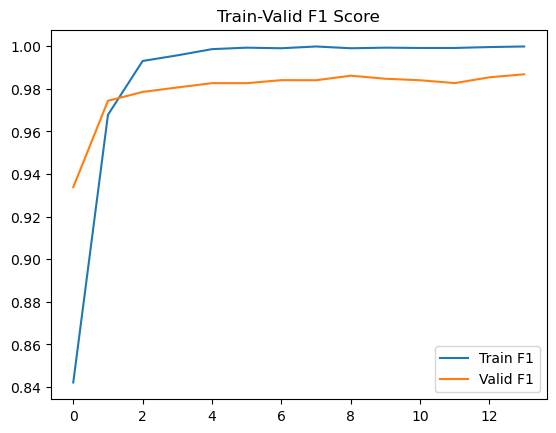

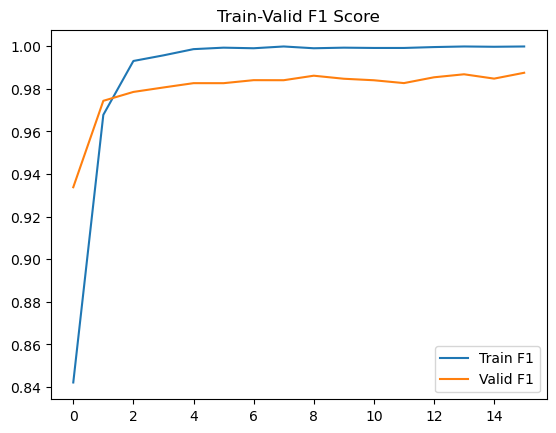

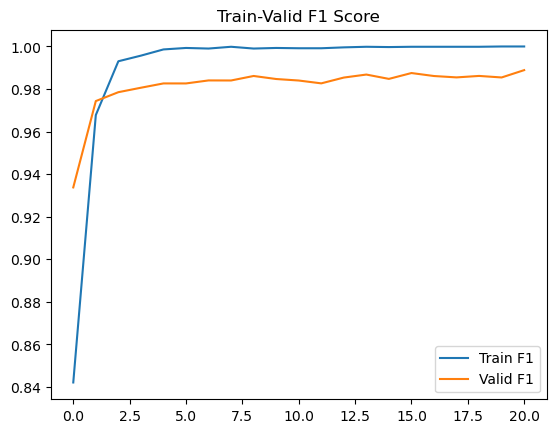

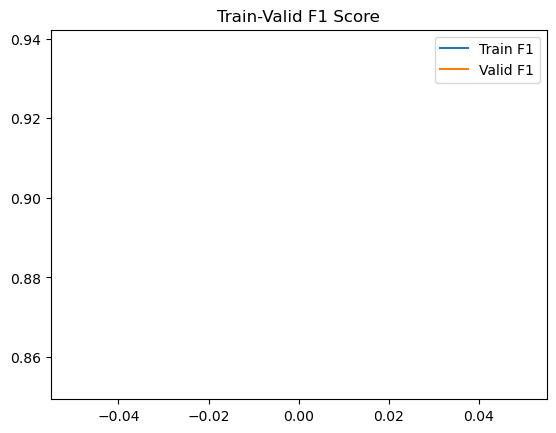

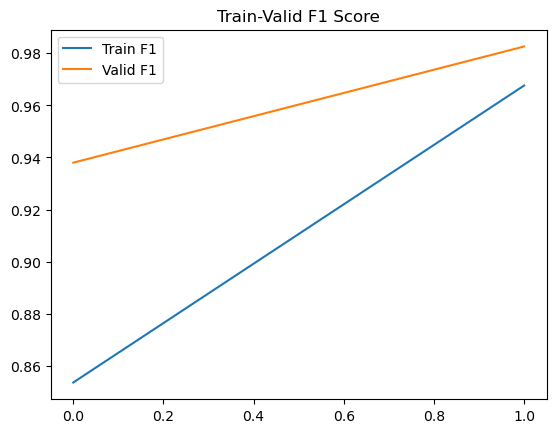

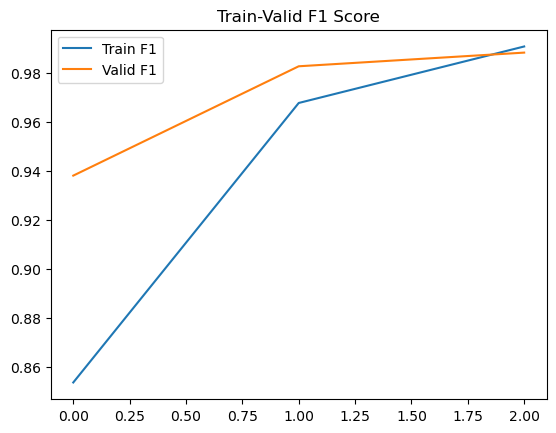

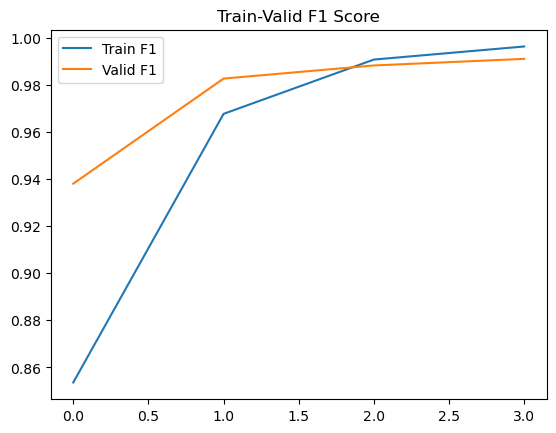

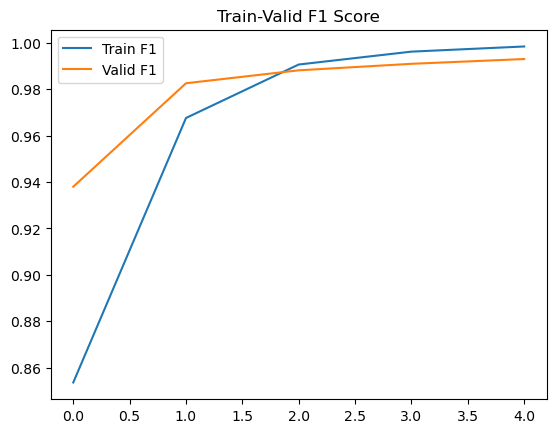

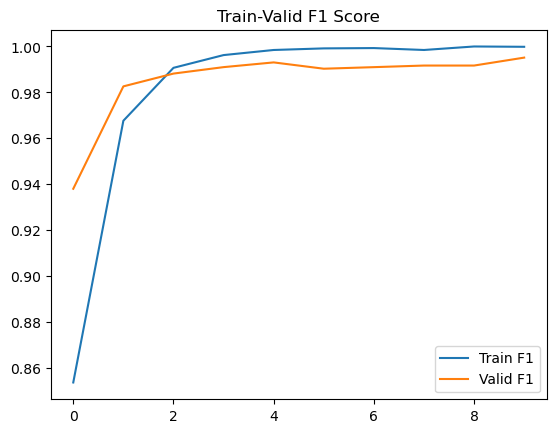

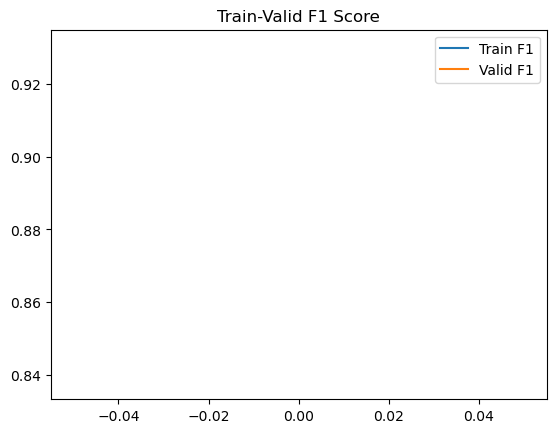

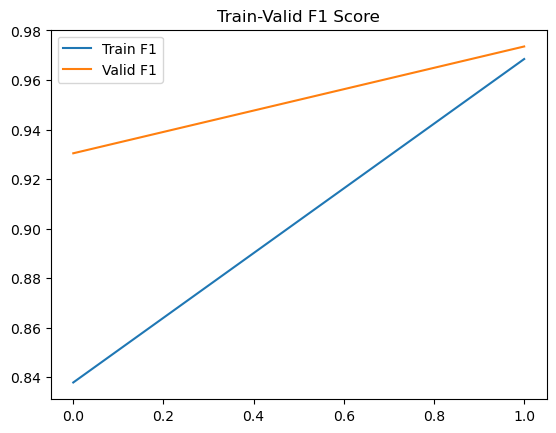

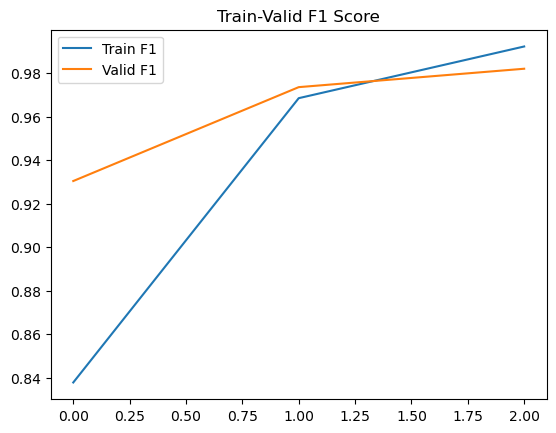

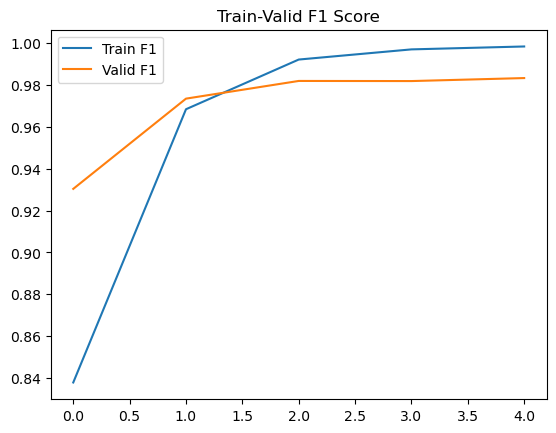

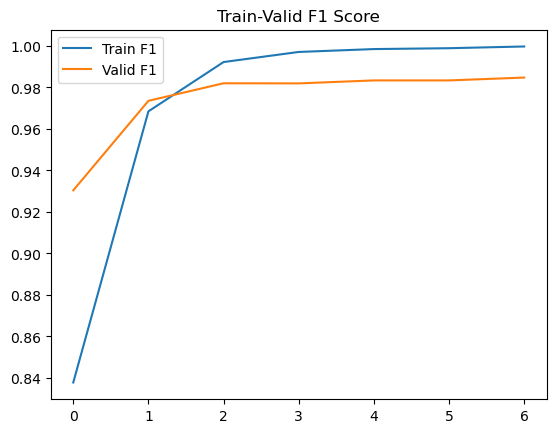

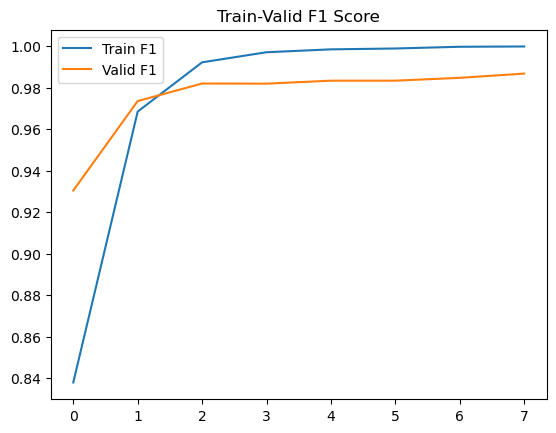

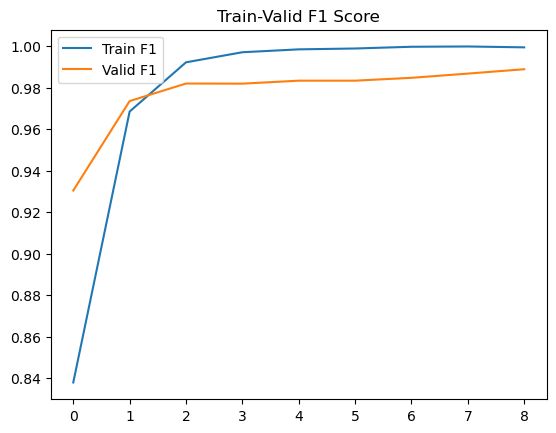

In [12]:
%run classification_baseline.ipynb

In [15]:
dist.destroy_process_group()

In [ ]:
model_dir = 'efficientnet_b2/efficientnet_b2_0_10'
%run eval_test.ipynb
test

In [11]:
print(f'accuracy: {test_acc:.4f}')
print(f'f1_score: {epoch_f1:.4f}')
print(f'confusion_matrix \n-------------------------\n {test_matrix}')

accuracy: 0.9752
f1_score: 0.9743
confusion_matrix 
-------------------------
 [[1453   47]
 [  15  985]]


In [24]:
test.to_csv('test_result/nsb2_oi_tst.csv', index=False)

In [8]:
test_acc = np.sum(test.label == test.pred) / len(test)
test_acc

0.9963420273292325